In [16]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

In [ ]:
# Created a list to append all tweet attributes(data)
attributes_container = []
user=input('username')
num=int(input('num of tweets'))

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterProfileScraper(user ).get_items()):
    if i>num:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe from the tweets list above 
tweets_df = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])
tweets_df

usernameelonmusk
num of tweets1000


C:\Users\96656\AppData\Local\Temp\ipykernel_32228\196481460.py:10: FutureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
Duplicate user 13298072 in card on tweet 1596869470873866241
Duplicate user 742143 in card on tweet 1594745232276557829


In [4]:
tweets_df.describe

<bound method NDFrame.describe of                  Date Created  Number of Likes     Source of Tweet  \
0   2022-12-03 01:17:10+00:00           190386  Twitter for iPhone   
1   2022-12-03 21:53:01+00:00             6738  Twitter for iPhone   
2   2022-12-03 21:51:59+00:00             3829  Twitter for iPhone   
3   2022-12-03 21:47:42+00:00            34463  Twitter for iPhone   
4   2022-12-03 21:41:45+00:00             2148  Twitter for iPhone   
..                        ...              ...                 ...   
96  2022-12-01 16:58:25+00:00            80757  Twitter for iPhone   
97  2022-12-01 16:36:56+00:00             3489  Twitter for iPhone   
98  2022-12-01 15:24:45+00:00           157352  Twitter for iPhone   
99  2022-12-01 08:00:19+00:00            43464  Twitter for iPhone   
100 2022-12-01 03:32:07+00:00           702631  Twitter for iPhone   

                                                Tweets location  
0                             @micsolana “Handled” 🔥🔥🔥     

In [12]:
a=pd.to_datetime(tweets_df['Date Created'])
a

0     2022-12-03 01:17:10+00:00
1     2022-12-03 21:53:01+00:00
2     2022-12-03 21:51:59+00:00
3     2022-12-03 21:47:42+00:00
4     2022-12-03 21:41:45+00:00
                 ...           
96    2022-12-01 16:58:25+00:00
97    2022-12-01 16:36:56+00:00
98    2022-12-01 15:24:45+00:00
99    2022-12-01 08:00:19+00:00
100   2022-12-01 03:32:07+00:00
Name: Date Created, Length: 101, dtype: datetime64[ns, UTC]

In [13]:
tweets_df

,Date Created,Number of Likes,Source of Tweet,Tweets,location
0,2022-12-03 01:17:10+00:00,190386,Twitter for iPhone,@micsolana “Handled” 🔥🔥🔥,
1,2022-12-03 21:53:01+00:00,6738,Twitter for iPhone,@karpathy Let’s throw a party and invite the w...,
2,2022-12-03 21:51:59+00:00,3829,Twitter for iPhone,@Devin_Simonson Agreed. Let’s just give him an...,
3,2022-12-03 21:47:42+00:00,34463,Twitter for iPhone,SBF was bad at League. Nuff said.,
4,2022-12-03 21:41:45+00:00,2148,Twitter for iPhone,@Jason @theallinpod Great podcast!,
...,...,...,...,...,...
96,2022-12-01 16:58:25+00:00,80757,Twitter for iPhone,Lot of people stuck in a damn-that’s-crazy Cha...,
97,2022-12-01 16:36:56+00:00,3489,Twitter for iPhone,@zswitten There still isn’t a good strawberry ...,
98,2022-12-01 15:24:45+00:00,157352,Twitter for iPhone,"As a reminder, tap the stars icon on upper rig...",
99,2022-12-01 08:00:19+00:00,43464,Twitter for iPhone,@cocainebear Always wondered about that bear …,


<AxesSubplot:xlabel='Date Created'>

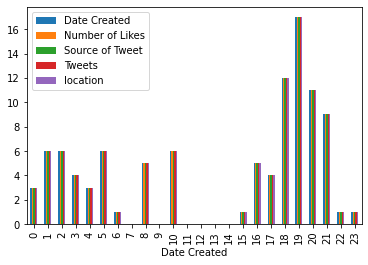

In [18]:
res = tweets_df.groupby(tweets_df["Date Created"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")
